<a href="https://colab.research.google.com/github/MongiBESBES/Energy/blob/main/Analyse_1020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
data_to_load = files.upload()

Saving Dataset_Be.xlsx to Dataset_Be.xlsx


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [19]:
df = pd.read_excel('/content/Dataset_Be.xlsx', header=0)
serie_temporelle=df['Be']

In [20]:
# Choisissez la colonne 'Be' comme variable cible
target_column = 'Be'
Be_values = df[target_column].values.reshape(-1, 1)

# Normalisez les valeurs entre 0 et 1
scaler = MinMaxScaler(feature_range=(0, 1))
Be_scaled = scaler.fit_transform(Be_values)

# Créez la série temporelle avec des séquences d'entrée et de sortie
def create_time_series(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

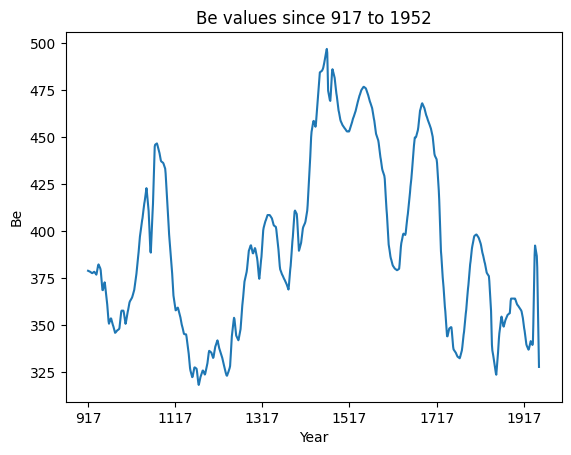

In [24]:

from matplotlib.ticker import FuncFormatter

# Tracer les données
df['Be'].plot()

# Définir une fonction de transformation personnalisée pour ajuster les indices
def ajuster_indices(x, pos):
    return int(x + 917)

# Appliquer la fonction de transformation personnalisée à l'axe des abscisses
formatter = FuncFormatter(ajuster_indices)
plt.gca().xaxis.set_major_formatter(formatter)

# Ajouter des étiquettes
plt.xlabel('Year')
plt.ylabel('Be')
plt.title('Be values since 917 until 1952')

# Afficher le graphique
plt.show()

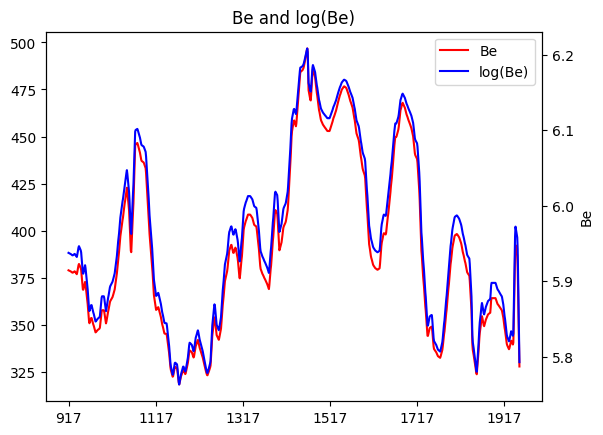

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = df['Be']
y = np.log(x)

# création d'un graphique avec la série originale
fig, ax = plt.subplots()
ln1 = ax.plot(x, c='r', label="Be")

# création d'un graphique avec la série log en conservent le même axe des abscisses
ax2 = ax.twinx()
ln2 = ax2.plot(y, c='b', label="log(Be)")


# Appliquer la fonction de transformation personnalisée à l'axe des abscisses
formatter = FuncFormatter(ajuster_indices)
plt.gca().xaxis.set_major_formatter(formatter)

# Ajouter des étiquettes
plt.xlabel('Year')
plt.ylabel('Be')
plt.title('Be and log(Be)')

# ajout de la légende
lns = ln1 + ln2
labels=[l.get_label() for l in lns]
ax.legend(lns, labels);

In [27]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.impute import SimpleImputer

# Sélectionnez la colonne que vous souhaitez tester
#serie_temporelle = df['Be']

# Convertissez les valeurs de la colonne `GHI` en valeurs de type float64
#serie_temporelle = serie_temporelle.astype(float)

# Impute the missing values
imputer = SimpleImputer(strategy='mean')
serie_temporelle = imputer.fit_transform(serie_temporelle.values.reshape(-1, 1))

# Effectuez le test de Dickey-Fuller sur la série temporelle imputée
resultats_test = adfuller(serie_temporelle)

# Affichez les résultats du test
print('Statistique de test :', resultats_test[0])
print('Valeur critique 1% :', resultats_test[4]['1%'])
print('Valeur critique 5% :', resultats_test[4]['5%'])
print('Valeur critique 10% :', resultats_test[4]['10%'])
print('P-valeur :', resultats_test[1])

# Interprétez les résultats
if resultats_test[1] <= 0.05:
    print("La série temporelle est stationnaire (rejeter l'hypothèse nulle)")
else:
    print("La série temporelle n'est pas stationnaire (ne pas rejeter l'hypothèse nulle)")


Statistique de test : -2.205870534207346
Valeur critique 1% : -3.436777287462024
Valeur critique 5% : -2.8643777347701866
Valeur critique 10% : -2.5682809352172242
P-valeur : 0.20412169536283503
La série temporelle n'est pas stationnaire (ne pas rejeter l'hypothèse nulle)


In [28]:
from statsmodels.tsa.arima.model import ARIMA
arma = ARIMA(serie_temporelle, order=(1,0,3)).fit()
arma.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1036
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -1358.504
Date:                Tue, 30 Jan 2024   AIC                           2729.008
Time:                        12:23:22   BIC                           2758.667
Sample:                             0   HQIC                          2740.261
                               - 1036                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        390.7829     43.283      9.029      0.000     305.950     475.615
ar.L1          0.9975      0.002    442.899      0.000       0.993       1.002
ma.L1          1.3911      0.013    108.675      0.000       1.366       1.416
ma.L2          1.0533      0.016     64.496      0.000       1.021       1.085
ma.L3          0.5001      0.012     42.675      0.000       0.477       0.523
sigma2         0.7983      0.012     65.485      0.000       0.774       0.822
===================================================================================
Ljung-Box (L1) (Q):                  30.73   Jarque-Bera (JB):             13534.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.37   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

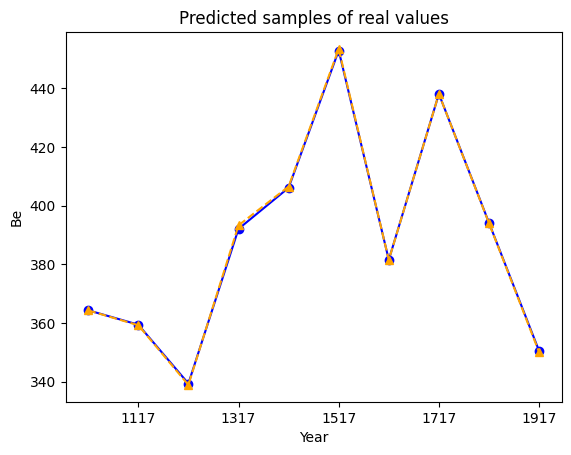

In [33]:
pred = arma.predict()
pred_df = pd.DataFrame(pred)
pred_echan = pred_df.iloc[100::100]
serie_temporelle_echan = pd.DataFrame(serie_temporelle).iloc[100::100]



# Appliquer la fonction de transformation personnalisée à l'axe des abscisses
formatter = FuncFormatter(ajuster_indices)
plt.gca().xaxis.set_major_formatter(formatter)

# Ajouter des étiquettes
plt.xlabel('Year')
plt.ylabel('Be')
plt.title('Be and log(Be)')


plt.plot(pred_echan, color='blue', marker='o')
plt.plot(serie_temporelle_echan, color='orange', linestyle='dashed', marker='^')
plt.title("Predicted samples of real values")
plt.show()



In [34]:
pred

array([390.78285329, 378.93848707, 378.76639186, ..., 356.53925093,
       341.85466005, 330.00097581])

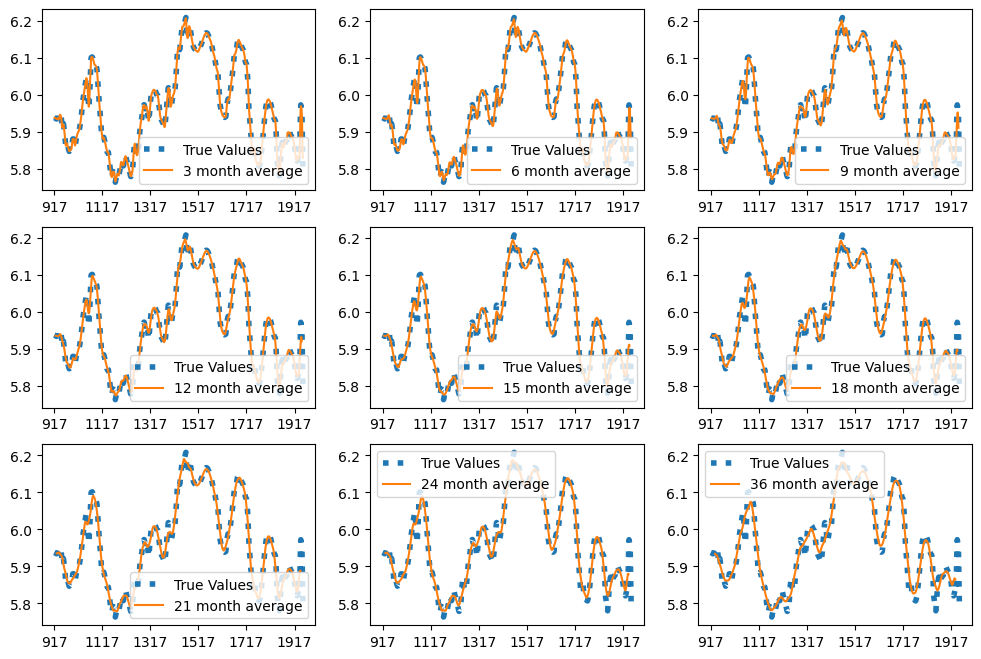

In [50]:
pred = arma.predict()
win = [3, 6, 9, 12, 15, 18, 21, 24, 36]
fig = plt.figure(figsize=(12,8))

for i in range(len(win)):
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(y, linestyle=':', linewidth=4, label=f"True Values")  # Tracer toutes les courbes en pointillés
    ax.plot(y.rolling(win[i], center=True).mean(), label=f"{win[i]} month average")
    ax.legend()
    # Appliquer la fonction de transformation personnalisée à l'axe des abscisses
    formatter = FuncFormatter(ajuster_indices)
    plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

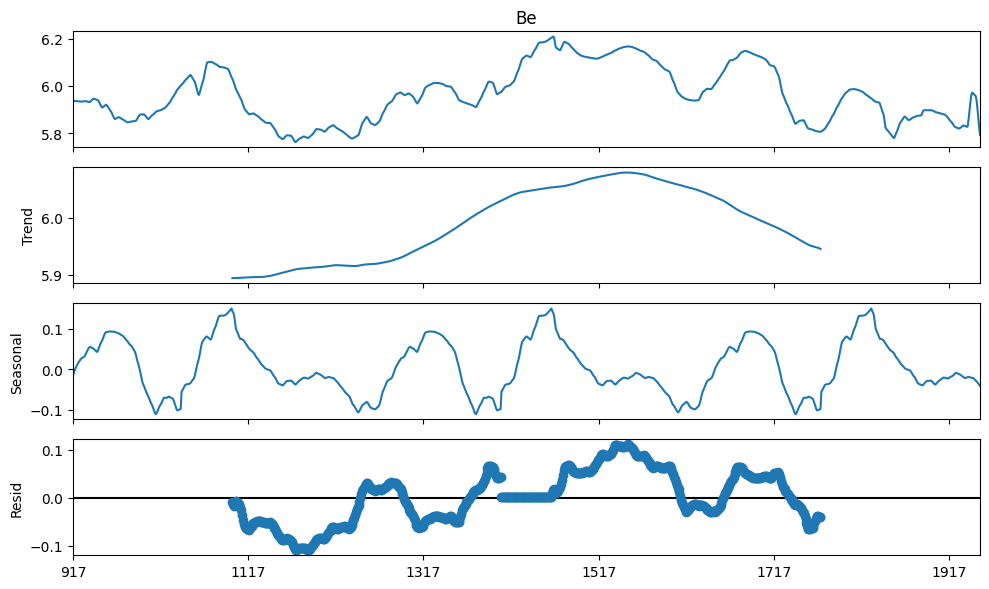

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing

# Décomposition saisonnière
decomp = seasonal_decompose(y.fillna(0), model='additive', period=365)



# Affichage des composantes
fig = decomp.plot()
fig.set_size_inches((10, 6))
# Appliquer la fonction de transformation personnalisée à l'axe des abscisses
formatter = FuncFormatter(ajuster_indices)
plt.gca().xaxis.set_major_formatter(formatter)
fig.tight_layout()

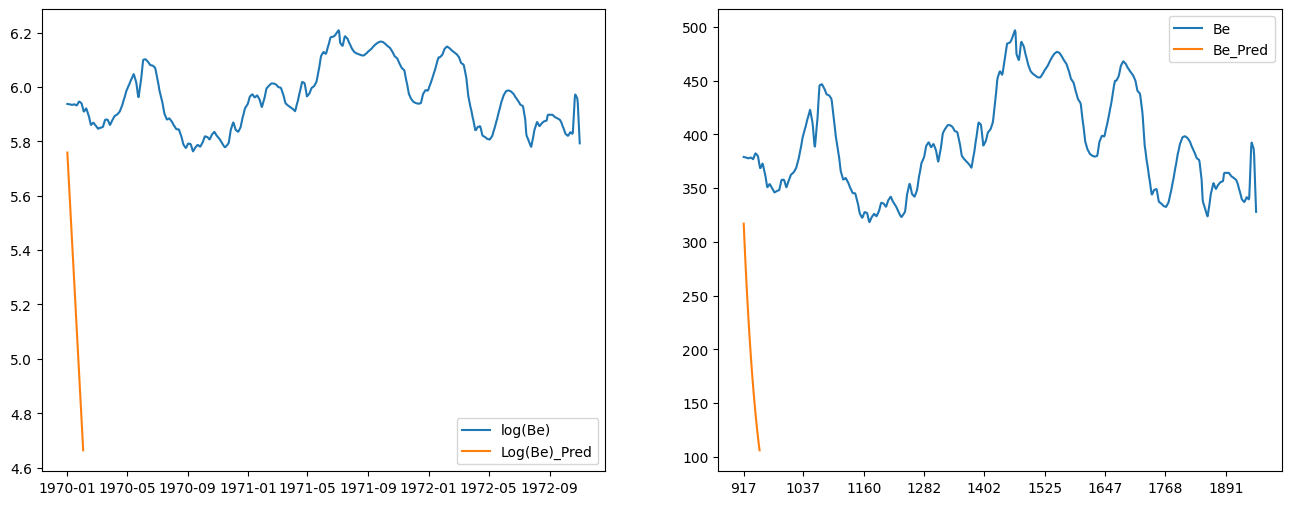

In [109]:
!pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing


x=df['Be']
y=np.log(x)

let = ExponentialSmoothing(y.values, seasonal_periods=11, trend='add', seasonal='add').fit()

y_pred = let.forecast(33)# prédiction pour la série log
x_pred = np.exp(let.forecast(33)) # récupération des prédiction pour la série originale


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
# Appliquer la fonction de transformation personnalisée à l'axe des abscisses
formatter = FuncFormatter(ajuster_indices)
plt.gca().xaxis.set_major_formatter(formatter)

ax1.plot(y, label='log(Be)')
ax1.plot(pd.date_range(y.index[len(y)-1], periods=33), y_pred, label='Log(Be)_Pred')
ax1.legend()


# Appliquer la fonction de transformation personnalisée à l'axe des abscisses
formatter = FuncFormatter(ajuster_indices)
plt.gca().xaxis.set_major_formatter(formatter)
ax2.plot(x, label='Be')
ax2.plot(pd.date_range(y.index[len(y)-1], periods=33), x_pred, label='Be_Pred')
ax2.legend()




plt.show()


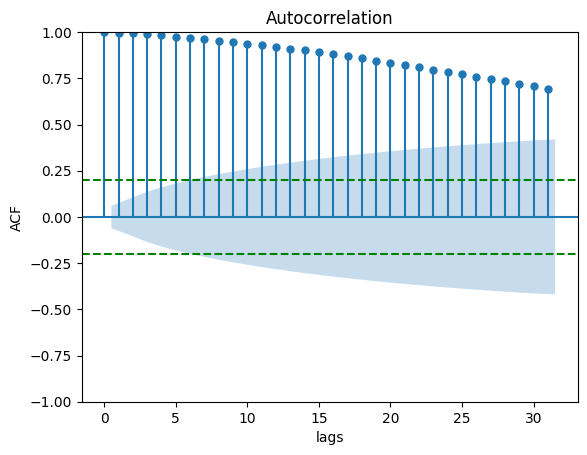

In [110]:
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as smt
import statsmodels.tsa.stattools as tsa
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(serie_temporelle)
# Ajout du titre de l'axe des x
plt.xlabel('lags')
# Ajout du titre de l'axe des y
plt.ylabel('ACF')
# Ajout d'une ligne pointillée verticale à x=3

plt.axhline(y=0.2, linestyle='--', color='green')
plt.axhline(y=-0.2, linestyle='--', color='green')

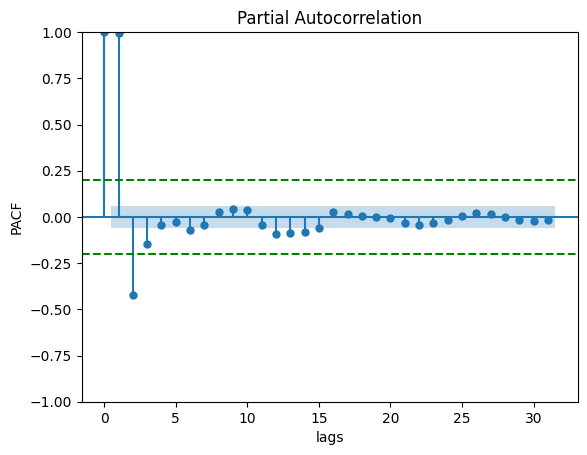

In [111]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(serie_temporelle)
# Ajout du titre de l'axe des x
plt.xlabel('lags')
# Ajout du titre de l'axe des y
plt.ylabel('PACF')
# Ajout d'une ligne pointillée verticale à x=3

plt.axhline(y=0.2, linestyle='--', color='green')
plt.axhline(y=-0.2, linestyle='--', color='green')

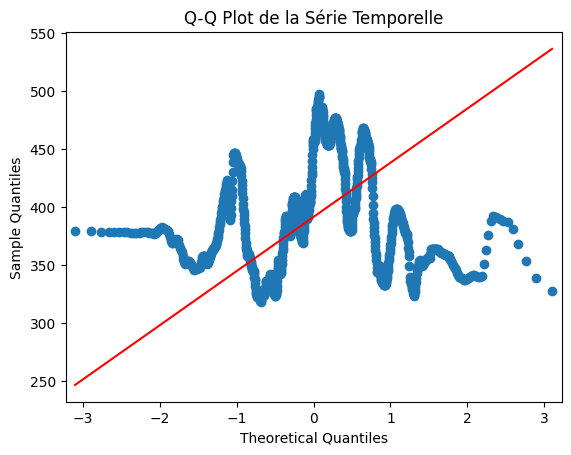

In [112]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calcul des quantiles théoriques
theoretical_quantiles = sm.ProbPlot(serie_temporelle).theoretical_quantiles

# Tracé du Q-Q plot
sm.qqplot(serie_temporelle, line='s')  # 's' pour une droite de référence
plt.title('Q-Q Plot de la Série Temporelle')
plt.show()

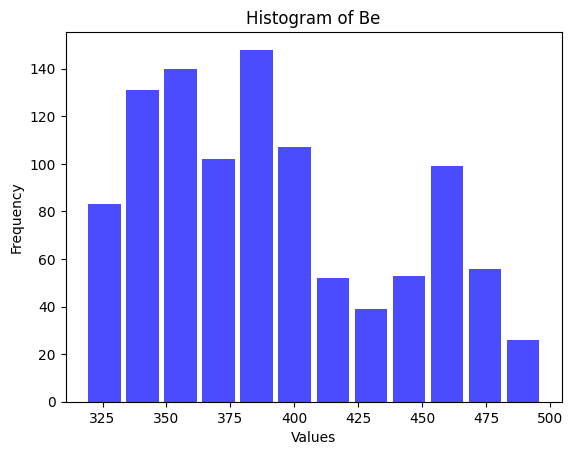

In [113]:
# Tracé de l'histogramme
plt.hist(serie_temporelle, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.title('Histogram of Be')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


In [114]:
from statsmodels.tsa.statespace.sarimax import *

m1 = SARIMAX(y.values, order=(1,1,1), seasonal_order=(1,1,1,12))
res1 = m1.fit(disp=False)
print(res1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1036
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                4713.988
Date:                            Tue, 30 Jan 2024   AIC                          -9417.975
Time:                                    14:36:01   BIC                          -9393.323
Sample:                                         0   HQIC                         -9408.616
                                           - 1036                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8257      0.011     77.870      0.000       0.805       0.846
ma.L1          0.5689      0.015   

In [115]:
m2 = SARIMAX(y.values, order=(1,1,1), seasonal_order=(0,1,1,12))
res2 = m2.fit(disp=False)
print(res2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1036
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                4782.157
Date:                            Tue, 30 Jan 2024   AIC                          -9556.313
Time:                                    14:36:07   BIC                          -9536.591
Sample:                                         0   HQIC                         -9548.826
                                           - 1036                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8257      0.010     86.888      0.000       0.807       0.844
ma.L1          0.5689      0.014   

In [116]:
m3 = SARIMAX(y.values, order=(0,1,1), seasonal_order=(0,1,1,12))
res3 = m3.fit(disp=False)
print(res3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1036
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                4294.062
Date:                            Tue, 30 Jan 2024   AIC                          -8582.125
Time:                                    14:36:18   BIC                          -8567.333
Sample:                                         0   HQIC                         -8576.509
                                           - 1036                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9512      0.004    220.219      0.000       0.943       0.960
ma.S.L12      -0.8632      0.021   

In [117]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print('Retard : p-value')

m3 = SARIMAX(y.values, order=(0,1,1), seasonal_order=(0,1,1,12))
res3 = m3.fit(disp=False)

# Réinitialiser l'index de la série résiduelle
residuals = pd.Series(res3.resid)
residuals.reset_index(drop=True, inplace=True)

# Afficher le retard et la p-value
print('Retard : p-value')
for lag in [6, 12, 18, 24, 30, 36]:
    p_values = acorr_ljungbox(residuals, lags=lag, return_df=False)
    p_value_mean = p_values.mean()
    print('{} : {}'.format(lag, p_value_mean))

Retard : p-value
Retard : p-value
6 : lb_stat      0.000301
lb_pvalue    0.998961
dtype: float64
12 : lb_stat      13.984927
lb_pvalue     0.916147
dtype: float64
18 : lb_stat      65.261513
lb_pvalue     0.610765
dtype: float64
24 : lb_stat      90.900009
lb_pvalue     0.458074
dtype: float64
30 : lb_stat      106.283189
lb_pvalue      0.366459
dtype: float64
36 : lb_stat      116.538783
lb_pvalue      0.305382
dtype: float64


In [118]:
from scipy.stats import shapiro
shapiro(res3.resid[13:])

ShapiroResult(statistic=0.8865891098976135, pvalue=1.0171450793147241e-26)

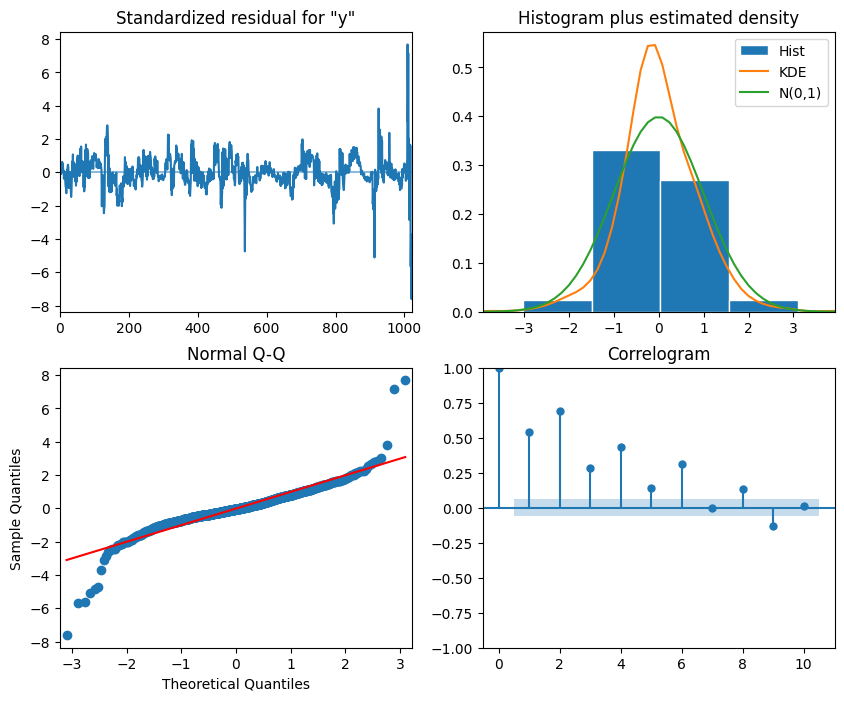

In [119]:
res3.plot_diagnostics(figsize=(10, 8));

In [120]:
!pip install statsmodels

In [121]:
!pip install --upgrade statsmodels

In [122]:
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing

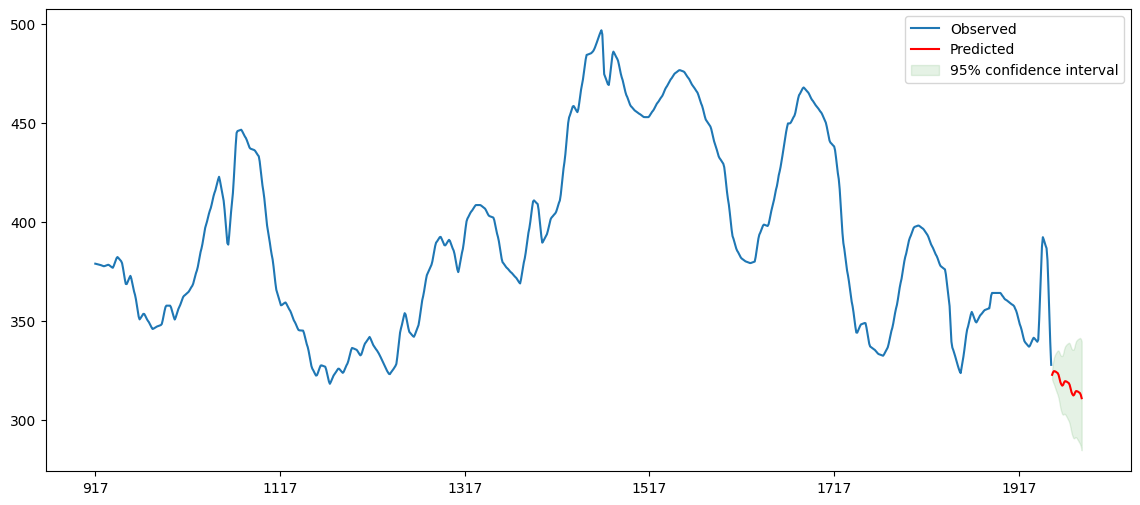

In [125]:
# Importation des modules nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supposons que 'res3' est votre modèle de régression, 'x' est votre DataFrame contenant les données observées

# Prédictions et intervalles de confiance
y_pred = res3.get_forecast(33)
x_pred = np.exp(y_pred.predicted_mean)
conf_int = pd.DataFrame(y_pred.conf_int(alpha=0.05))
x_pred_inf = np.exp(conf_int.iloc[:, 0])
x_pred_sup = np.exp(conf_int.iloc[:, 1])

# Générer un nouvel index à partir du dernier index existant
last_index = x.index[-1]
nombre_de_valeurs = 33  # Nombre de nouveaux indices à générer
nouvel_index = pd.Index(range(last_index + 1, last_index + 1 + nombre_de_valeurs), name=x.index.name)

# Tracé
plt.figure(figsize=(14, 6))
plt.plot(x.index, x.values, label='Observed')
plt.plot(nouvel_index, x_pred, color='r', label='Predicted')
plt.fill_between(nouvel_index, x_pred_inf, x_pred_sup, color='g', alpha=0.1, label='95% confidence interval')
plt.legend()
# Appliquer la fonction de transformation personnalisée à l'axe des abscisses
formatter = FuncFormatter(ajuster_indices)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  802
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                3494.658
Date:                            Tue, 30 Jan 2024   AIC                          -6983.317
Time:                                    14:38:54   BIC                          -6969.305
Sample:                                         0   HQIC                         -6977.931
                                            - 802                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9126      0.014     63.483      0.000       0.884       0.941
ma.S.L12      -0.8359      0.027   

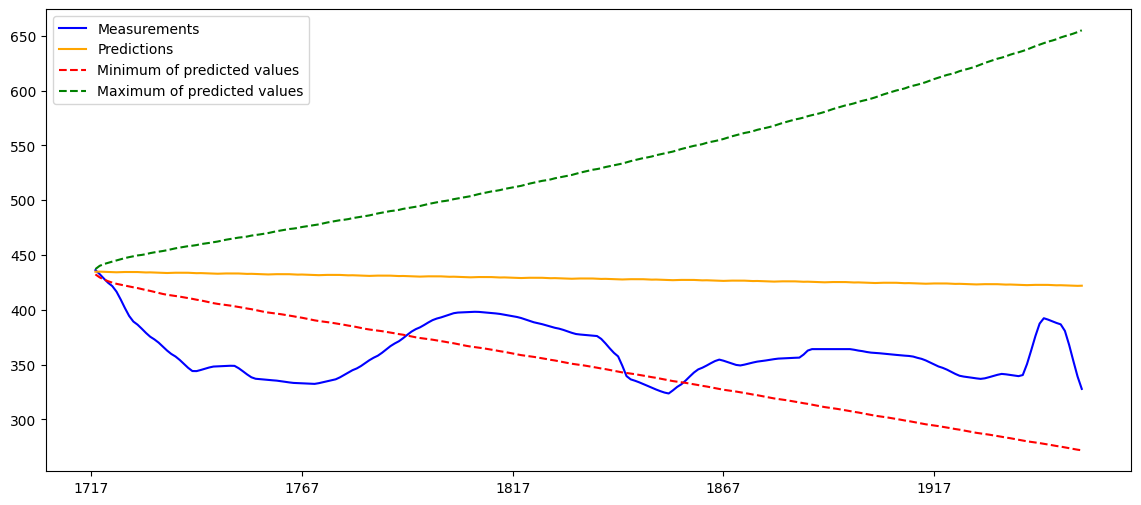

RMSE = 70.84892678864985 et MAPE = 19.042526153040505


In [126]:
# série x : Mesures BE

indice_division = 800

# Découper les données en ensembles d'entraînement et de test en utilisant les indices
x_train = x.iloc[:indice_division + 1]  # +1 pour inclure la ligne correspondant à l'indice de division
x_test = x.iloc[indice_division + 1:]  # Commencer à l'indice suivant celui de division

y_train = y.loc[:indice_division + 1]
y_test = y.loc[indice_division + 1:]


# modélisation et summary
model = SARIMAX(y_train.values, order=(0,1,1), seasonal_order=(0,1,1,12))
res = model.fit(disp=False)
print(res.summary())

# test d'autocorrélation des résidus
print('Retard : p-value')
for lag in [6, 12, 18, 24, 30, 36]:
    p_values = acorr_ljungbox(residuals, lags=lag, return_df=False)
    p_value_mean = p_values.mean()
    print('{} : {}'.format(lag, p_value_mean))

# test de normalité des résidus
print(shapiro(res.resid[13:]))

# prédiction et intervalles de confiance
y_pred = res.get_forecast(len(y_test))
x_pred = np.exp(y_pred.predicted_mean)
x_pred_inf = [np.exp(p[0]) for p in y_pred.conf_int(alpha=0.05)]
x_pred_sup = [np.exp(p[1]) for p in y_pred.conf_int(alpha=0.05)]

# graphique
plt.figure(figsize=(14,6))
# Appliquer la fonction de transformation personnalisée à l'axe des abscisses
formatter = FuncFormatter(ajuster_indices)
plt.gca().xaxis.set_major_formatter(formatter)
plt.plot(x_test.index, x_test.values, color='blue',label='Measurements')
plt.plot(x_test.index, x_pred, color='orange', label='Predictions')
plt.plot(x_test.index, x_pred_inf, color='red', linestyle='--', label= 'Minimum of predicted values')
plt.plot(x_test.index, x_pred_sup, color='green', linestyle='--', label= 'Maximum of predicted values')
plt.legend()
plt.show()

# métriques
rmse = np.sqrt(((x_test-x_pred)**2).mean())
mape = (np.abs(1-x_pred/x_test)).mean()*100
print("RMSE = {} et MAPE = {}".format(rmse, mape))

In [127]:
from statsmodels.tsa.statespace.sarimax import *
from tqdm import tqdm
import itertools

import warnings
warnings.filterwarnings(action='ignore') #'once' pour afficher le warning une seule fois

# on génère toutes les combinaisons possibles des paramèters
p = d = q = P = D = Q = range(2)
params = list(itertools.product(p, d, q, P, D, Q))

# on initialise nos paramètres optimaux
tmp_model = None
best = {}
best['aic'] = {'pdq': None, 'PDQ':None, 'model':None, 'aic':np.inf, 'bic':np.inf}
best['bic'] = {'pdq': None, 'PDQ':None, 'model':None, 'aic':np.inf, 'bic':np.inf}

for p,d,q,P,D,Q in tqdm(params):
    tmp_model = SARIMAX(y_train,
                        order = (p,d,q),
                        seasonal_order = (P,D,Q,12),
                        enforce_stationarity=True,
                        enforce_invertibility=True)
    res = tmp_model.fit(disp=False)

    if res.aic < best['aic']['aic']:
        best['aic']['aic'] = res.aic
        best['aic']['bic'] = res.bic
        best['aic']['pdq'] = (p,d,q)
        best['aic']['PDQ'] = (P,D,Q)
        best['aic']['model'] = res

    if res.bic < best['bic']['bic']:
        best['bic']['aic'] = res.aic
        best['bic']['bic'] = res.bic
        best['bic']['pdq'] = (p,d,q)
        best['bic']['PDQ'] = (P,D,Q)
        best['bic']['model'] = res

print(f"Modèle retenu selon le critère AIC : SARIMA{best['aic']['pdq']}{best['aic']['PDQ']}12 - AIC:{best['aic']['aic']} - BIC:{best['aic']['bic']}")
print(f"Modèle retenu selon le critère BIC : SARIMA{best['bic']['pdq']}{best['bic']['PDQ']}12 - AIC:{best['bic']['aic']} - BIC:{best['bic']['bic']}")

100%|██████████| 64/64 [02:17<00:00,  2.15s/it]

Modèle retenu selon le critère AIC : SARIMA(1, 1, 1)(0, 0, 0)12 - AIC:-7923.865515012063 - BIC:-7909.807932170858
Modèle retenu selon le critère BIC : SARIMA(1, 1, 1)(0, 0, 0)12 - AIC:-7923.865515012063 - BIC:-7909.807932170858


                               SARIMAX Results                                
Dep. Variable:                     Be   No. Observations:                  802
Model:               SARIMAX(1, 1, 1)   Log Likelihood                3964.933
Date:                Tue, 30 Jan 2024   AIC                          -7923.866
Time:                        14:41:31   BIC                          -7909.808
Sample:                             0   HQIC                         -7918.466
                                - 802                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8213      0.013     63.702      0.000       0.796       0.847
ma.L1          0.6135      0.016     37.262      0.000       0.581       0.646
sigma2      2.917e-06   6.56e-08     44.496      0.0

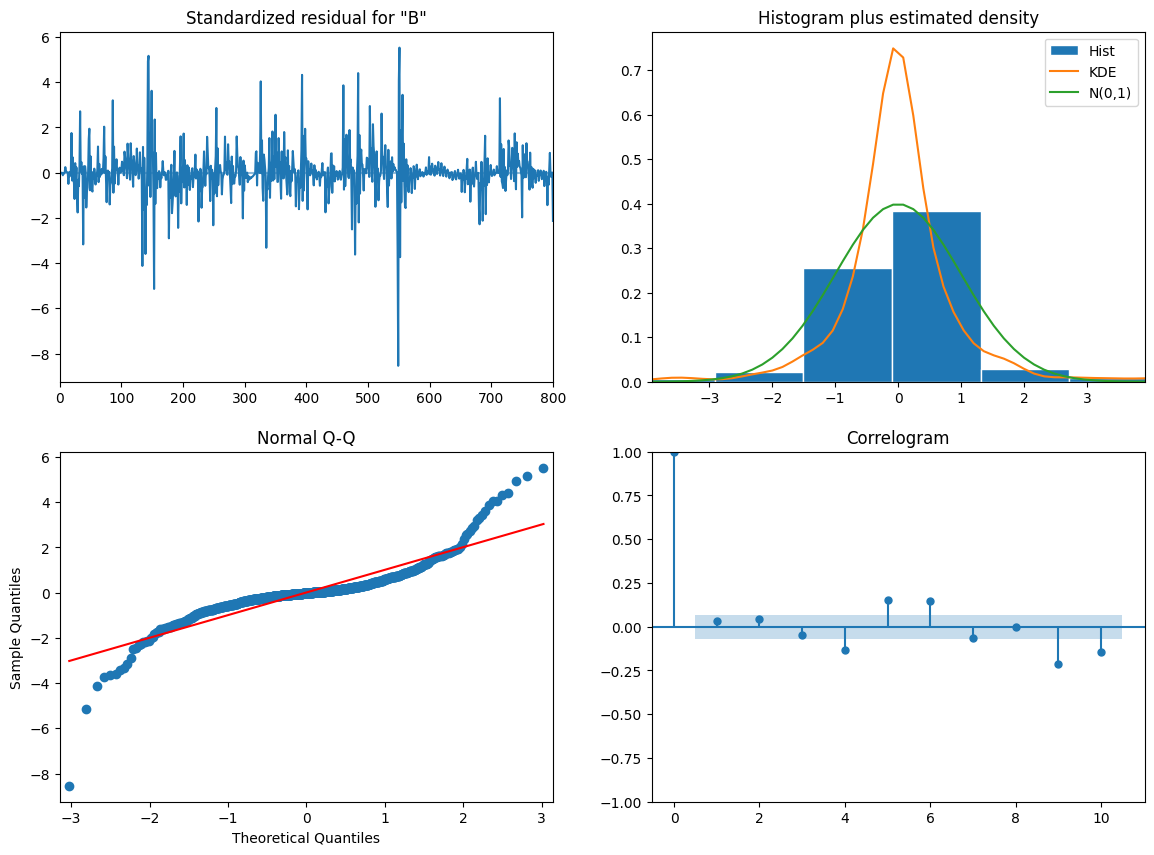

In [128]:
# modèle retenu
res = best['aic']['model']

# summary
print(res.summary())

# résidus
res.plot_diagnostics(figsize=(14, 10));
print("Test de Shapiro :", shapiro(res.resid[13:]))



# métriques
rmse = np.sqrt(((x_test-x_pred)**2).mean())
mape = (np.abs(1-x_pred/x_test)).mean()*100
print("RMSE = {} et MAPE = {}".format(rmse, mape))

In [129]:
pip install git+https://github.com/RJT1990/pyflux

  Cloning https://github.com/RJT1990/pyflux to /tmp/pip-req-build-tltxssin
  Running command git clone --filter=blob:none --quiet https://github.com/RJT1990/pyflux /tmp/pip-req-build-tltxssin
  Resolved https://github.com/RJT1990/pyflux to commit 297f2afc2095acd97c12e827dd500e8ea5da0c0f
  Preparing metadata (setup.py) ... done


In [130]:
!pip install pyflux
!pip show pyflux
import pyflux

Name: pyflux
Version: 0.4.17
Summary: PyFlux: A time-series analysis library for Python
Home-page: https://github.com/rjt1990/pyflux
Author: Ross Taylor
Author-email: rj-taylor@live.co.uk
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: numdifftools, numpy, pandas, patsy, scipy
Required-by: 


In [131]:
import pyflux.smoothing as smoothing
from pyflux.smoothing import SmootherStatespace

ModuleNotFoundError: No module named 'pyflux.smoothing'

In [105]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pyflux.smoothing import SmootherStatespace

# Ajuster le modèle Exponential Smoothing (si ce n'est pas déjà fait)
model = ExponentialSmoothing(x, seasonal='add', seasonal_periods=365)
res = model.fit()

# Prédiction et intervalles de confiance
smoother = SmootherStatespace(res.model)
y_pred = smoother.get_prediction(start=indice_division + 1, end=1035)
x_pred = np.exp(y_pred.predicted_mean)
pred_CI = np.exp(y_pred.conf_int())


# Affichage
plt.figure(figsize=(14, 10))

# Tracer la série observée en pointillé
plt.plot(x, label='Measurements', color='blue', marker='.', linestyle='')

# Tracer les prévisions avec intervalle de confiance
plt.plot(x_pred, label='Predictions', color='red', linestyle='--', marker='o')

# Remplir l'intervalle de confiance
plt.fill_between(pred_CI.index, pred_CI.iloc[:, 0], pred_CI.iloc[:, 1], color='plum', alpha=.25)

# Ajouter un fond gris après la dernière date observée
plt.axvspan(1035, x.index[-1], alpha=0.1, color='grey')

# Personnalisation de l'axe des x et y
plt.xlabel('Year')
plt.ylabel('Be')

# Légende
plt.legend(loc='upper left')


ModuleNotFoundError: No module named 'pyflux.smoothing'